# Relatórios 6 - 9

- Gabriel Wendell Celestino Rocha

In [18]:
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import scipy.constants as const
from scipy import stats
import pandas as pd
import scipy as sp
import numpy as np

%matplotlib notebook

def opt_plot():
    # plt.style.use('dark_background')
    plt.grid(True, linestyle = ':', color = '0.50')
    plt.minorticks_on()
    plt.tick_params(axis = 'both', which = 'minor', direction = "in",
                        top = True, right = True, length = 5, width = 1, labelsize = 15)
    plt.tick_params(axis = 'both', which = 'major', direction = "in",
                        top = True, right = True, length = 8, width = 1, labelsize = 15)

### Atividade 6

$$N=\frac{\Delta d}{\lambda}=\frac{\ell v^{2}}{\lambda c^{2}}=0.22$$

In [37]:
def delta_d(ell, v, lamb):
    c = const.c
    lamb = lamb*1e-9
    delta_d = (ell*v**2)/(lamb*c**2)
    
    return print('d =', delta_d)

delta_d(, 400)

#### Letra b)

In [15]:
def Lambda(t, n):
    Lambda = t * n
    
    return Lambda

t = [2., 1., 3.]
n = [1.4, 1., 1.5]
Lambda = [Lambda(t[0], n[0]), Lambda(t[1], n[1]), Lambda(t[2], n[2])]
Lambda_res = sum(Lambda)
print('Lambda_res =', Lambda_res, 'mm')

Lambda_res = 8.3 mm


#### Letra c)

$$n=\frac{(2t-N\lambda)(1-\cos{i})}{2t(1-\cos{i})-N\lambda}$$

In [19]:
def index_refrac(t, N, lamb, i):
    i = np.radians(i)
    t = t*1e-3
    lamb = lamb*1e-9
    n = ((2*t-N*lamb)*(1-np.cos(i)))/(2*t*(1-np.cos(i))-N*lamb)
    
    return n

print('n =', index_refrac(1, 50, 633, 21))

n = 1.292005826445026


#### Letra d)

$$\Delta=2(\overline{ae}-\overline{ac})=N\lambda=2t\left(\sqrt{n^2-\sin^2{i}}+1-n-\cos{i}\right)$$

In [21]:
def Delta(t, n, i):
    t = t*1e-3
    i = np.radians(i)
    Delta = 2*t*(np.sqrt(n**2 - (np.sin(i))**2)+1-n-np.cos(i))
    
    return Delta

print('Delta = ', Delta(1, 1.29, 21), 'm')

Delta =  3.1284153648832414e-05 m


#### Letra e)

$$m'=\lfloor m \rfloor,\quad m=\frac{2d}{\lambda}$$

In [29]:
def m(d, lamb):
    d = d*1e-6
    lamb = lamb*1e-9
    m = 2*d/lamb
    
    return print('m =', int(m), 'rings')

m(1.5, 633)

m = 4 rings


#### Letra f)

$$2d=m\lambda\iff\lambda=\frac{2d}{m}$$

In [33]:
def Lamb(d, m):
    d = d*1e-5
    Lamb = (2*d/m)/1e-9
    
    return print('lambda =', Lamb, 'nm')

Lamb(2.4, 90)

lambda = 533.3333333333333 nm


---

### Atividade 8

### Letra d)

In [38]:
m = const.m_e
m

9.1093837015e-31

In [40]:
def delta_x(v):
    delta_p = const.m_e * v
    delta_x = const.h/(4*np.pi*delta_p)
    
    return print('delta_x =', delta_x, 'm')

delta_x(40)

delta_x = 1.4470954515184504e-06 m


#### Letra e)

In [43]:
def delta_v(delta_x, m):
    delta_p = const.h/(4*np.pi*delta_x)
    delta_v = delta_p/m
    
    return print('delta_v =', delta_v, 'm/s')

delta_v(2*1e-6, 5.86*1e-26)

delta_v = 0.0004499026525794182 m/s


---

### Atividade 9

In [109]:
const.speed_of_light

299792458.0

In [74]:
Exp9 = pd.read_csv('Exp9.csv')
Exp9['c/e*lambda'] = const.speed_of_light/(const.elementary_charge*Exp9['lambda'])
Exp9

,lambda,Volts,c/e*lambda
0,578.0,0.617,3.237296e+24
1,546.0,0.738,3.427028e+24
2,436.0,1.334,4.291645e+24
3,405.0,1.521,4.620142e+24
4,366.0,1.898,5.112452e+24


In [89]:
x_data = Exp9['c/e*lambda']*1e9
y_data = Exp9['Volts']

deg = 1
p = np.polyfit(x_data, y_data, deg)
m = p[0]  
c = p[1]  
print(f'A reta ajustada tem equação y = {m}x {c:=+}')


n = y_data.size
m = p.size

dof = n - m
alpha = 0.05
tails = 2
t_critical = stats.t.ppf(1 - (alpha / tails), dof)
print('t crítico =', t_critical)



y_model = np.polyval(p, x_data)
model = np.poly1d(p)
y_model = model(x_data)

y_bar = np.mean(y_data)
R2 = np.sum((y_model - y_bar)**2) / np.sum((y_data - y_bar)**2)

print(f'R² = {R2:.2f}')



resid = y_data - y_model
chi2 = sum((resid / y_model)**2)
chi2_red = chi2 / dof
std_err = np.sqrt(sum(resid**2) / dof)
print('Desvio padrão =', std_err)

A reta ajustada tem equação y = 6.775900030197727e-34x -1.5820727220504847
t crítico = 3.182446305284263
R² = 1.00
Desvio padrão = 0.01923056035937313


<IPython.core.display.Javascript object>


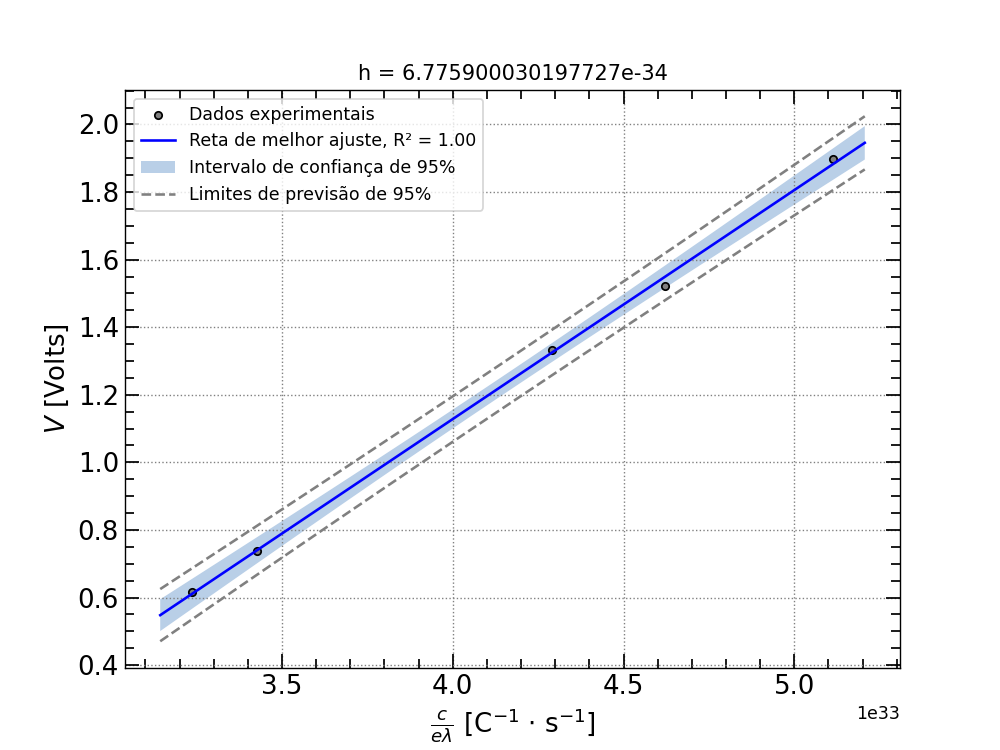

Coeficiente angular =  6.775900030197727e-34
Coeficiente linear =  -1.5820727220504847


In [107]:
plt.figure(figsize = (8,6))
plt.scatter(x_data, y_data, c = 'gray', marker = 'o', edgecolors = 'k', s = 18, label = 'Dados experimentais')
xlim = plt.xlim()
ylim = plt.ylim()

plt.plot(np.array(xlim), p[1] + p[0] * np.array(xlim), color = 'blue', label = f'Reta de melhor ajuste, R² = {R2:.2f}')

x_fitted = np.linspace(xlim[0], xlim[1], 100)
y_fitted = np.polyval(p, x_fitted)

ci = t_critical * std_err * np.sqrt(1 / n + (x_fitted - np.mean(x_data))**2 / np.sum((x_data - np.mean(x_data))**2))
plt.fill_between(
    x_fitted, y_fitted + ci, y_fitted - ci, facecolor = '#b9cfe7', zorder = 0,
    label = r'Intervalo de confiança de 95%')

pi = t_critical * std_err * np.sqrt(1 + 1 / n + (x_fitted - np.mean(x_data))**2 / np.sum((x_data - np.mean(x_data))**2))
plt.plot(x_fitted, y_fitted - pi, '--', color = '0.5', label = r'Limites de previsão de 95%')
plt.plot(x_fitted, y_fitted + pi, '--', color = '0.5')


plt.legend(loc = 'best')
plt.title('h = {:}'.format(p[0]))
plt.xlabel(r'$\frac{c}{e\lambda}$ [C$^{-1}$ $\cdot$ s$^{-1}$]', fontsize = 15)
plt.ylabel(r'$V$ [Volts]', fontsize = 15)
opt_plot()
plt.savefig('Fit_h.png', dpi = 400)

print('Coeficiente angular = ', p[0])
print('Coeficiente linear = ', p[1])

In [97]:
err = (1 - p[0]/const.h)*100
print('Erro =', abs(err), '%')

Erro = 2.261217838113705 %


In [111]:
A = -p[1]*const.elementary_charge/1e-19
print(A)

2.5347599485580634


In [115]:
def py(lamb, alpha):
    h = const.h
    lamb = lamb*1e-9
    py = (np.sin(alpha)*h)/lamb
    
    return print('Delta py =', py)

py(632.8, 0.54)

Delta py = 5.38353531500212e-28
